##### Design a predictive model to estimate medical insurance costs for individuals based on a combination of demographic information, such as age, gender, BMI, smoking status, geographical location, and pre-existing medical conditions. The model should accurately forecast insurance costs for individuals, facilitating insurance providers in risk assessment, premium pricing, and resource allocation. This predictive tool aims to optimize insurance pricing strategies while ensuring fairness and affordability for policyholders.

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline

# EDA

## 1. Data Collection

In [78]:
df = pd.read_csv(r'C:\Users\Prajeesh\Documents\GitHub\MachineLearning\Supervised ML\Datasets\medical insurance cost prediction.csv')
df_num= df[['age','bmi']]
df_cat = df[['sex','children','smoker','region']]
df_target = df.charges
df.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Data Cleaning

### Checking the `Data types`

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### Checking for `Null values` or `Missing Values`

In [80]:
null = df.isnull().sum()
percent_null = (null/df.shape[0]) * 100
df_null = pd.concat([null,percent_null],axis=1)
df_null.columns = ['null','Percent']
df_null

,null,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


### Checking for `outliers`

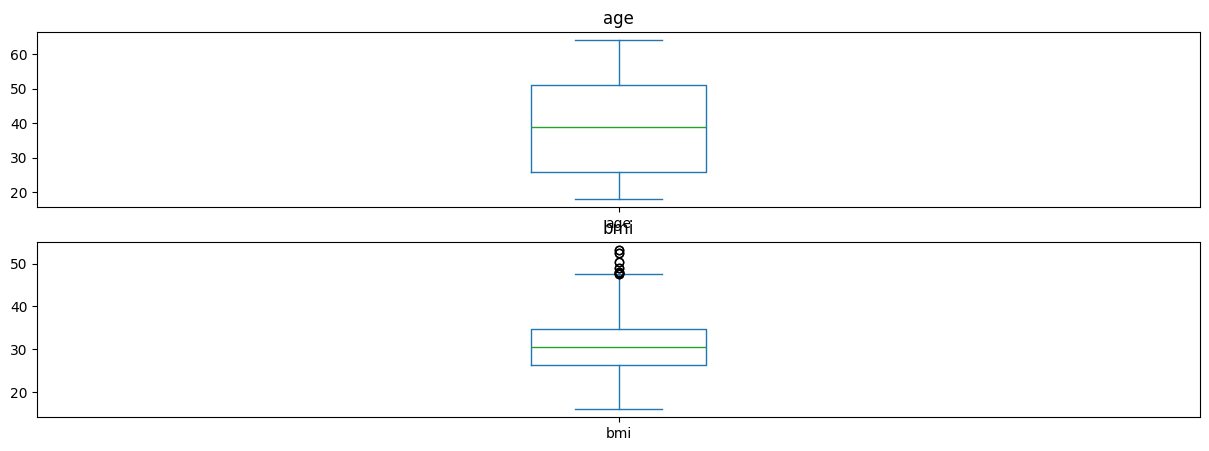

In [81]:
num_cols = 2
num_rows = (df_num.shape[1] + num_cols -1)//num_cols
fig,axes = plt.subplots(num_cols,num_rows,figsize = (15, 5*num_rows))
for i, ax in enumerate(axes.flatten()):
    if i < df_num.shape[1]:
        df_num.iloc[:,i].plot(kind='box',ax=ax)
        ax.set_title(df_num.columns[i])

## 3. Descriptive Statistics

In [82]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## 4. Univariate Analysis

### Checking the `Distribution` of the Dataset

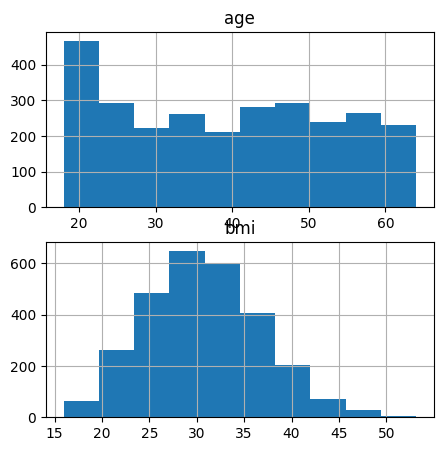

In [83]:
num_col = 2
num_rows = (df_num.shape[1] + num_col -1) // num_col
fig, axes = plt.subplots(num_col,num_rows,figsize=(5,5*num_rows))
for i,ax in enumerate(axes.flatten()):
    if i < df_num.shape[1]:
        df_num.iloc[:,i].hist(ax=ax)
        ax.set_title(df_num.columns[i])


### Checking the `skewness` of the Dataset

In [84]:
skewness = skew(df_num)
print("Skewness of the dataset:")
print(skewness)

Skewness of the dataset:
[0.0616055  0.27979273]


In [85]:
skewness = df_num.skew()
print("Skewness of the dataset:")
print(skewness)

Skewness of the dataset:
age    0.061639
bmi    0.279944
dtype: float64


## 5. Bivariate Analysis

<Axes: >

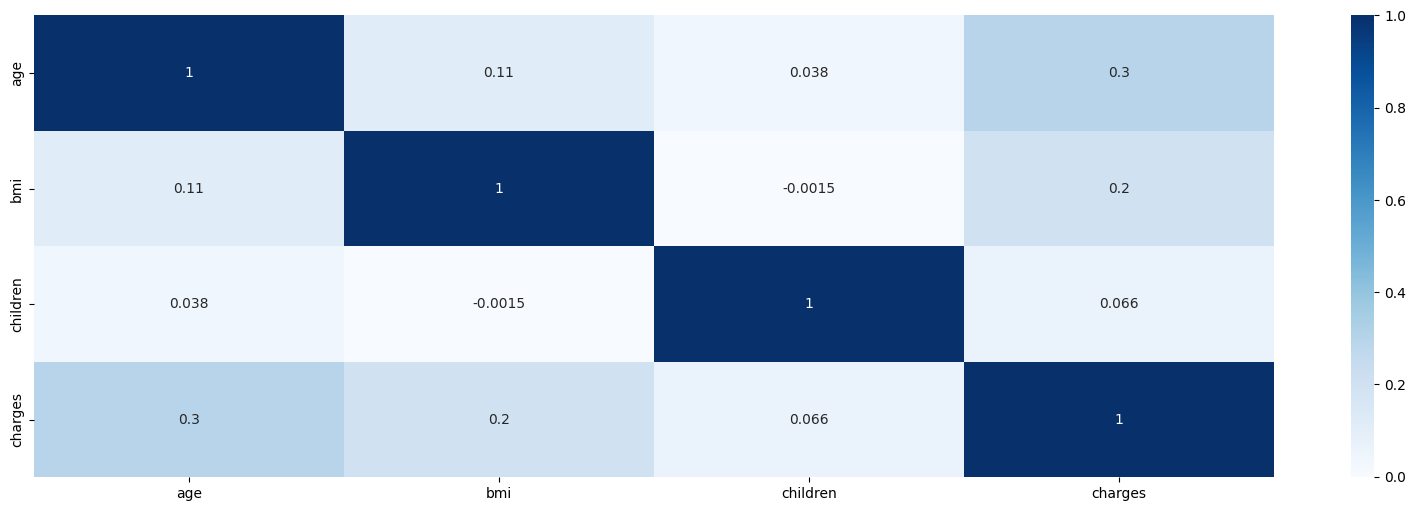

In [86]:
plt.figure(figsize=(20,6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,cmap='Blues',annot=True)

## 6. Feature Engineering

In [87]:
df_num_enc = df_num.copy()
scalar = StandardScaler()
df_num_enc = scalar.fit_transform(df_num_enc)
df_num_enc = pd.DataFrame(df_num_enc,columns=df_num.columns)

In [88]:
df_cat_enc = df_cat.copy()
df_cat_enc = pd.get_dummies(df_cat_enc,drop_first=False,dtype=int).drop(columns={'children'})

In [89]:
df_chilld_enc = df.children.copy()
df_chilld_enc = pd.get_dummies(df_chilld_enc,dtype=int,prefix='child')

In [90]:
df.children.value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

In [91]:
# Concatenate all encoded DataFrames into a new DataFrame
df_concat = pd.concat([df_num_enc, df_cat_enc, df_chilld_enc], axis=1)

In [92]:
df_concat

,age,bmi,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,child_0,child_1,child_2,child_3,child_4,child_5
0,-1.428353,-0.457114,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,-1.499381,0.500731,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,-0.789099,0.375085,0,1,1,0,0,0,1,0,0,0,0,1,0,0
3,-0.433959,-1.304814,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4,-0.504987,-0.297201,0,1,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,0.560436,2.385417,1,0,1,0,0,0,1,0,0,1,0,0,0,0
2768,-1.286297,0.636167,1,0,1,0,0,0,0,1,1,0,0,0,0,0
2769,-1.428353,-0.762253,0,1,0,1,0,1,0,0,0,1,0,0,0,0
2770,-1.144240,-1.955887,0,1,1,0,0,1,0,0,1,0,0,0,0,0


In [93]:
X = df_concat
Y = df_target

## 7. Model Training

In [94]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=57)
print("The shape xtrain: ", xtrain.shape)
print("The shape xtest: ",xtest.shape)
print("The shape of ytrain: ",ytrain.shape)
print("The shape of ytest", ytest.shape)

The shape xtrain:  (2217, 16)
The shape xtest:  (555, 16)
The shape of ytrain:  (2217,)
The shape of ytest (555,)


In [95]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(xtrain,ytrain)

LinearRegression()

In [98]:
prediction = lin_reg_model.predict(xtest)
error = mean_squared_error(ytest,prediction)
error

38974157.09530466

In [97]:
lin_reg_model.score(xtrain,ytrain)

0.7540125591284104